In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

cheating = np.hstack([df_test['SK_ID_CURR'], np.zeros(48744)]).reshape((-1, 2), order='F')

submission = pd.DataFrame({
       "SK_ID_CURR": cheating[:,0],
       "TARGET": cheating[:,1]
   })

submission.SK_ID_CURR = submission.SK_ID_CURR.astype(int)
submission.TARGET = submission.TARGET.astype(int)

submission.to_csv("cheating.csv", index=False)

In [2]:
df_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#print(df_train[:,'CODE_GENDER':'AMT_CREDIT'])
df1 = df_train[['CODE_GENDER','AMT_CREDIT']]  
df1.head()

,CODE_GENDER,AMT_CREDIT
0,M,406597.5
1,F,1293502.5
2,M,135000.0
3,F,312682.5
4,M,513000.0


In [4]:
df_male = df1.loc[df1['CODE_GENDER'] == 'M']
print(df_male.head())
ave_m = np.average(df_male['AMT_CREDIT'])
print('Average Credit Amount for Males = ' + str(ave_m))

  CODE_GENDER  AMT_CREDIT
0           M    406597.5
2           M    135000.0
4           M    513000.0
5           M    490495.5
7           M   1530000.0
Average Credit Amount for Males = 611095.1970844953


In [5]:
df_female = df1.loc[df1['CODE_GENDER'] == 'F']
print(df_female.head())
ave_f = np.average(df_female['AMT_CREDIT'])
print('Average Credit Amount for Females = ' + str(ave_f))

   CODE_GENDER  AMT_CREDIT
1            F   1293502.5
3            F    312682.5
6            F   1560726.0
8            F   1019610.0
10           F    652500.0
Average Credit Amount for Females = 592766.7173051846


In [6]:
df_xna = df1.loc[df1['CODE_GENDER'] == 'XNA']
print(df_xna.head())
ave_xna = np.average(df_xna['AMT_CREDIT'])
print('Average Credit Amount for XNA = ' + str(ave_xna))

       CODE_GENDER  AMT_CREDIT
35657          XNA    382500.0
38566          XNA    270000.0
83382          XNA    405000.0
189640         XNA    540000.0
Average Credit Amount for XNA = 399375.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Average Credit Amount for Females = 592766.7173051846
Average Credit Amount for Males = 611095.1970844953
Average Credit Amount for XNA = 399375.0


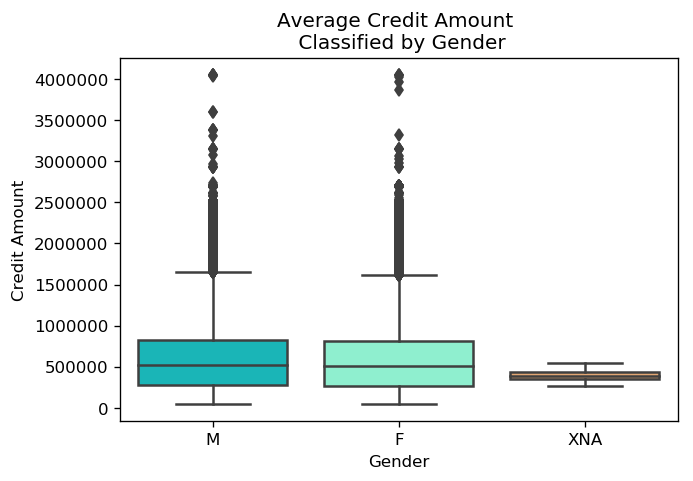

In [8]:
plt.figure(dpi=120)

sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', palette = 
            ['darkturquoise','aquamarine','sandybrown'], data=df1);
plt.xlabel("Gender");
plt.ylabel("Credit Amount");
print('Average Credit Amount for Females = ' + str(ave_f))
print('Average Credit Amount for Males = ' + str(ave_m))
print('Average Credit Amount for XNA = ' + str(ave_xna))
plt.title('Average Credit Amount \n Classified by Gender');

Average Credit Amount for Females = 592766.7173051846
Average Credit Amount for Males = 611095.1970844953
Average Credit Amount for XNA = 399375.0


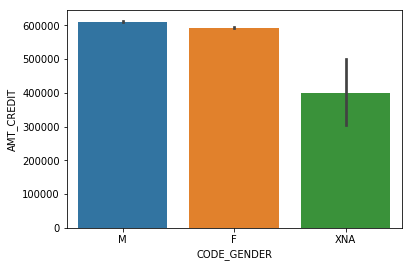

In [9]:
sns.barplot(x='CODE_GENDER', y='AMT_CREDIT', data= df_train,);
print('Average Credit Amount for Females = ' + str(ave_f))
print('Average Credit Amount for Males = ' + str(ave_m))
print('Average Credit Amount for XNA = ' + str(ave_xna))



In [10]:
df2 = df_train[['CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT']]
df2.head()

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
0,M,202500.0,406597.5
1,F,270000.0,1293502.5
2,M,67500.0,135000.0
3,F,135000.0,312682.5
4,M,121500.0,513000.0


In [11]:
df_male_new = df2.loc[df2['CODE_GENDER'] == 'M']
df_male_new.head()

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
0,M,202500.0,406597.5
2,M,67500.0,135000.0
4,M,121500.0,513000.0
5,M,99000.0,490495.5
7,M,360000.0,1530000.0


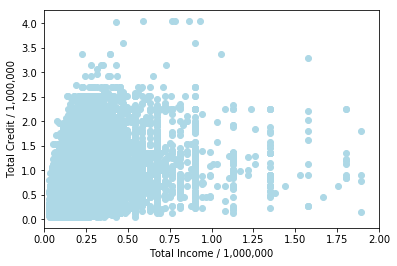

In [12]:
new_male_x = df_male_new['AMT_INCOME_TOTAL']/1000000
new_male_y = df_male_new['AMT_CREDIT']/1000000
plt.scatter(data = df_male_new, x = new_male_x, y = new_male_y, color = 'lightBlue')
plt.xlabel('Total Income / 1,000,000')
plt.ylabel('Total Credit / 1,000,000');
plt.xlim(0.0,2);

In [13]:
df_female_new = df2.loc[df2['CODE_GENDER'] == 'F']
df_female_new.head()

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
1,F,270000.0,1293502.5
3,F,135000.0,312682.5
6,F,171000.0,1560726.0
8,F,112500.0,1019610.0
10,F,112500.0,652500.0


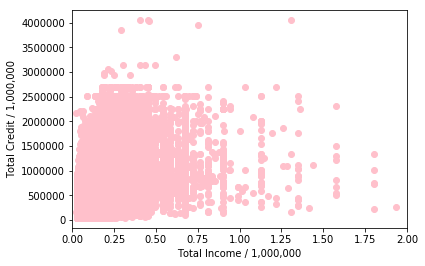

In [14]:
new_female_x = df_female_new['AMT_INCOME_TOTAL']/1000000
new_female_y = df_female_new['AMT_CREDIT']/1000000
plt.scatter(data = df_female_new, x = new_female_x, y = 'AMT_CREDIT', color = 'Pink')
plt.xlabel('Total Income / 1,000,000')
plt.ylabel('Total Credit / 1,000,000');
plt.xlim(0.0,2);

In [15]:
X = df2.loc[:,'AMT_INCOME_TOTAL'].values
y = df2.loc[:, 'AMT_CREDIT'].values

In [21]:
df3 = df_train[['NAME_CONTRACT_TYPE','CODE_GENDER','AMT_CREDIT']]
df3.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT
0,Cash loans,M,406597.5
1,Cash loans,F,1293502.5
2,Revolving loans,M,135000.0
3,Cash loans,F,312682.5
4,Cash loans,M,513000.0


AVERAGE AMOUNT OF CREDIT FOR MALES WITH CASH LOANS IS 637214.56
AVERAGE AMOUNT OF CREDIT FOR MALES WITH REVOLVING LOANS IS 352175.13


AVERAGE AMOUNT OF CREDIT FOR FEMALES WITH CASH LOANS IS 623137.32
AVERAGE AMOUNT OF CREDIT FOR FEMALES WITH REVOLVING LOANS IS 310206.38


AVERAGE AMOUNT OF CREDIT FOR XNA WITH CASH LOANS IS 0
AVERAGE AMOUNT OF CREDIT FOR XNA WITH REVOLVING LOANS IS 399375.0


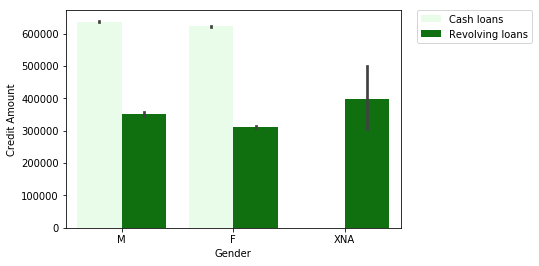

In [69]:
sns.barplot(x = "CODE_GENDER", y = "AMT_CREDIT", hue = "NAME_CONTRACT_TYPE", data = df3, color = 'g');
plt.xlabel("Gender");
plt.ylabel("Credit Amount");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

a = df3.loc[df3['CODE_GENDER'] == 'M']
aa = a.loc[a['NAME_CONTRACT_TYPE'] == 'Cash loans']
aaa = round(np.average(aa['AMT_CREDIT']),2)
print('AVERAGE AMOUNT OF CREDIT FOR MALES WITH CASH LOANS IS ' + str(aaa))

b = df3.loc[df3['CODE_GENDER'] == 'M']
bb = b.loc[b['NAME_CONTRACT_TYPE'] == 'Revolving loans']
bbb = round(np.average(bb['AMT_CREDIT']),2)
print('AVERAGE AMOUNT OF CREDIT FOR MALES WITH REVOLVING LOANS IS ' + str(bbb))

print('\n')

c = df3.loc[df3['CODE_GENDER'] == 'F']
cc = c.loc[c['NAME_CONTRACT_TYPE'] == 'Cash loans']
ccc= round(np.average(cc['AMT_CREDIT']),2)
print('AVERAGE AMOUNT OF CREDIT FOR FEMALES WITH CASH LOANS IS ' + str(ccc))

d = df3.loc[df3['CODE_GENDER'] == 'F']
dd = d.loc[d['NAME_CONTRACT_TYPE'] == 'Revolving loans']
ddd = round(np.average(dd['AMT_CREDIT']),2)
print('AVERAGE AMOUNT OF CREDIT FOR FEMALES WITH REVOLVING LOANS IS ' + str(ddd))

print('\n')

'''e = df3.loc[df3['CODE_GENDER'] == 'XNA']
ee = e.loc[e['NAME_CONTRACT_TYPE'] == 'Cash loans']
eee= np.average(ee['AMT_CREDIT'])'''

print('AVERAGE AMOUNT OF CREDIT FOR XNA WITH CASH LOANS IS ' + str(0))

f = df3.loc[df3['CODE_GENDER'] == 'XNA']
ff = f.loc[f['NAME_CONTRACT_TYPE'] == 'Revolving loans']
fff = round(np.average(ff['AMT_CREDIT']),2)
print('AVERAGE AMOUNT OF CREDIT FOR XNA WITH REVOLVING LOANS IS ' + str(fff))



